In [24]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.naive_bayes import GaussianNB

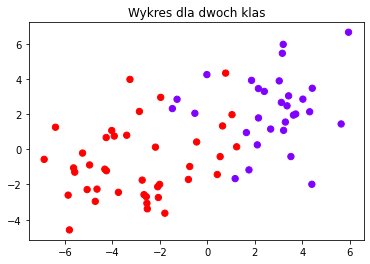

In [25]:
#Srednie dla klas 
m1 = np.array([-3,-1])
m2 = np.array([2,2])
#Liczności dla klas
n1 = 40
n2 = 30 
#Macierz kowariancji 
S = np.array([[4,0],[0,4]])

#Generuje punktu klas z rozkladu normalnego 
r1 = np.random.multivariate_normal(m1,S,n1)
r2 = np.random.multivariate_normal(m2,S,n2)

#Okreslenie klas w macierzy r12 
r12 = np.concatenate((r1,r2))
y = np.hstack((np.zeros(n1), np.ones(n2)))
plt.scatter(r12[:,0],r12[:,1], c=y, s=40, cmap="rainbow_r");
plt.title("Wykres dla dwoch klas");

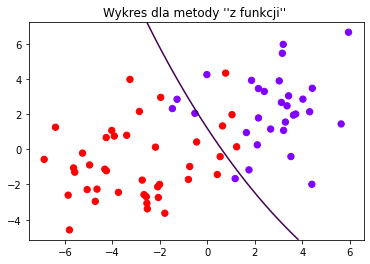

In [33]:
#Sposób z funkcji utworzenie modelu
model = GaussianNB()
model.fit(r12,y)
#Ustalenie współrzędnych punktów z klasami, rozsianie ich
plt.scatter(r12[:,0],r12[:,1], c=y,cmap="rainbow_r", s = 40);
lim = plt.axis()
xf, yf = np.meshgrid(np.linspace(lim[0], lim[1],100),
                     np.linspace(lim[2], lim[3],100))
#Uporządkowanie danych
v = np.c_[xf.ravel(), yf.ravel()]

#Okreslenie prawdopodobienstw
Z = model.predict_proba(v)
Z = Z[:, 1].reshape(xf.shape)

plt.contour(xf, yf, Z,[0.5]);
plt.title("Wykres dla metody ''z funkcji'' ");


In [34]:
#Prawdopodobieństwa wystąpienia dla klas
pi1 = n1/(n1+n2)
pi2 = n2/(n1+n2)
#Wyliczanie średnich
me1 = np.mean(r1, axis = 0)
me2 = np.mean(r2, axis = 0)
#Wyliczanie macierzy kowariancji
se1 = np.cov(r1.T)
se2 = np.cov(r2.T)
#Wyliczanie wariancji 
var1 = np.var(r1, axis = 0)
var2 = np.var(r2, axis = 0)

#Uwspólniam powyższe 
pi = [pi1,pi2]
mex = [me1[0],me2[0]]
mey = [me1[1],me2[1]]
varx = [var1[0],var2[0]]
vary = [var1[1],var2[1]]

$p(x_i = l|k) = \frac{1}{\sqrt{2*\pi * \sigma_k^2}}*e^{-\frac{(v-\sigma_k^2)}{(2\sigma_k^2)}}$

$\stackrel{\text{^}}{c} = argmax(\pi_k p(x|k) p(y|k)) $

In [35]:
def NB(v):
    pxf, pyf = [0,0],[0,0]
    c = np.zeros((2,len(v)))
    for k in range(2): 
        pxf[k] = (1 / np.sqrt(2 * np.pi * varx[k])) * np.exp(-(v[:,0]-mex[k])**2/(2*varx[k]))
        pyf[k] = (1 / np.sqrt(2 * np.pi * vary[k])) * np.exp(-(v[:,1]-mey[k])**2/(2*vary[k]))
        c[k] = pi[k] * pxf[k] * pyf[k]
    return np.array([np.argmax([c[0,n],c[1,n]]) for n in range(len(v))])

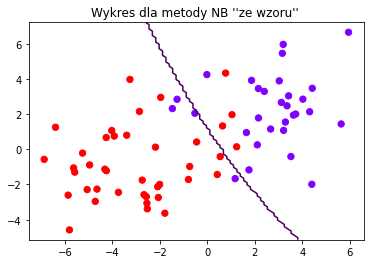

In [36]:
y1 = NB(v)
y1 = y1.reshape(xf.shape)
plt.scatter(r12[:,0],r12[:,1], c=y, s=40, cmap="rainbow_r");
plt.contour(xf, yf, y1,[0.5]);
plt.title("Wykres dla metody NB ''ze wzoru'' ");

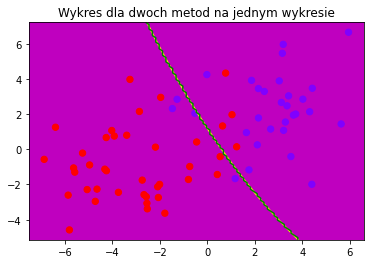

In [37]:
plt.scatter(r12[:,0],r12[:,1], c=y, s=40, cmap="rainbow_r");
plt.contour(xf, yf, Z,[0.5],colors = 'yellow');
plt.contour(xf, yf, y1,[0.5],colors = 'green');
plt.title("Wykres dla dwoch metod na jednym wykresie");
ax = plt.gca()
ax.set_facecolor('m')

Na powyższym wykresie widzimy, że metody są praktycznie sobie równoważne z dokładnością do binowania dla metody ze wzoru. 
Ustawiono xf i yf na 100 próbek aby było widać przykrywanie. Dla wiekszych wartosci widac ze rownowazne. 
